# Hierarchical Clustering and Dendrogram Visualization

This notebook demonstrates how to perform hierarchical clustering using different linkage methods and visualize the results using dendrograms. We will use various datasets to illustrate the process.

## Step 1: Import Libraries and Prepare the Data

We start by importing the necessary libraries and creating a simple dataset for clustering.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

# Set plot style
sns.set_style('dark')

## Step 2: Create and Visualize a Sample Dataset

We start with a simple dataset to visualize clustering and dendrograms.

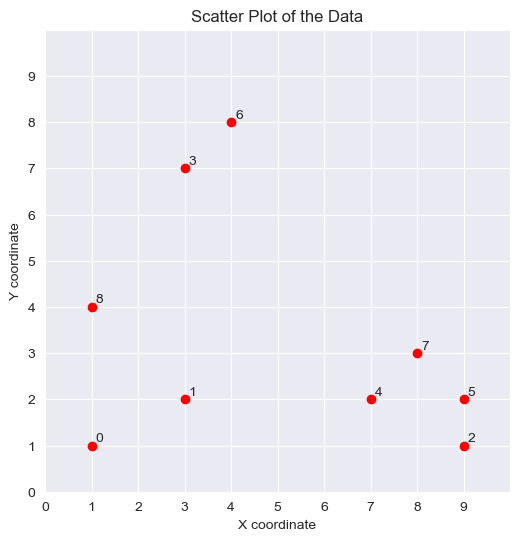

In [2]:
# Create a sample dataset
x1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,2], [4,8], [8,3], [1,4]])

# Plot the data points
plt.figure(figsize=(6,6))
plt.scatter(x1[:,0], x1[:,1], c='r')

# Annotate data points
for i in range(x1.shape[0]):
    plt.annotate(str(i), xy=(x1[i,0], x1[i,1]), xytext=(3,3), textcoords='offset points')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Scatter Plot of the Data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()
plt.show()

## Step 3: Perform Hierarchical Clustering on the Sample Data

Apply different linkage methods to visualize clustering effects using dendrograms.

In [3]:
# Perform hierarchical clustering using various linkage methods
Z_single = linkage(x1, method='single', metric='euclidean')
Z_complete = linkage(x1, method='complete', metric='euclidean')
Z_average = linkage(x1, method='average', metric='euclidean')
Z_ward = linkage(x1, method='ward', metric='euclidean')

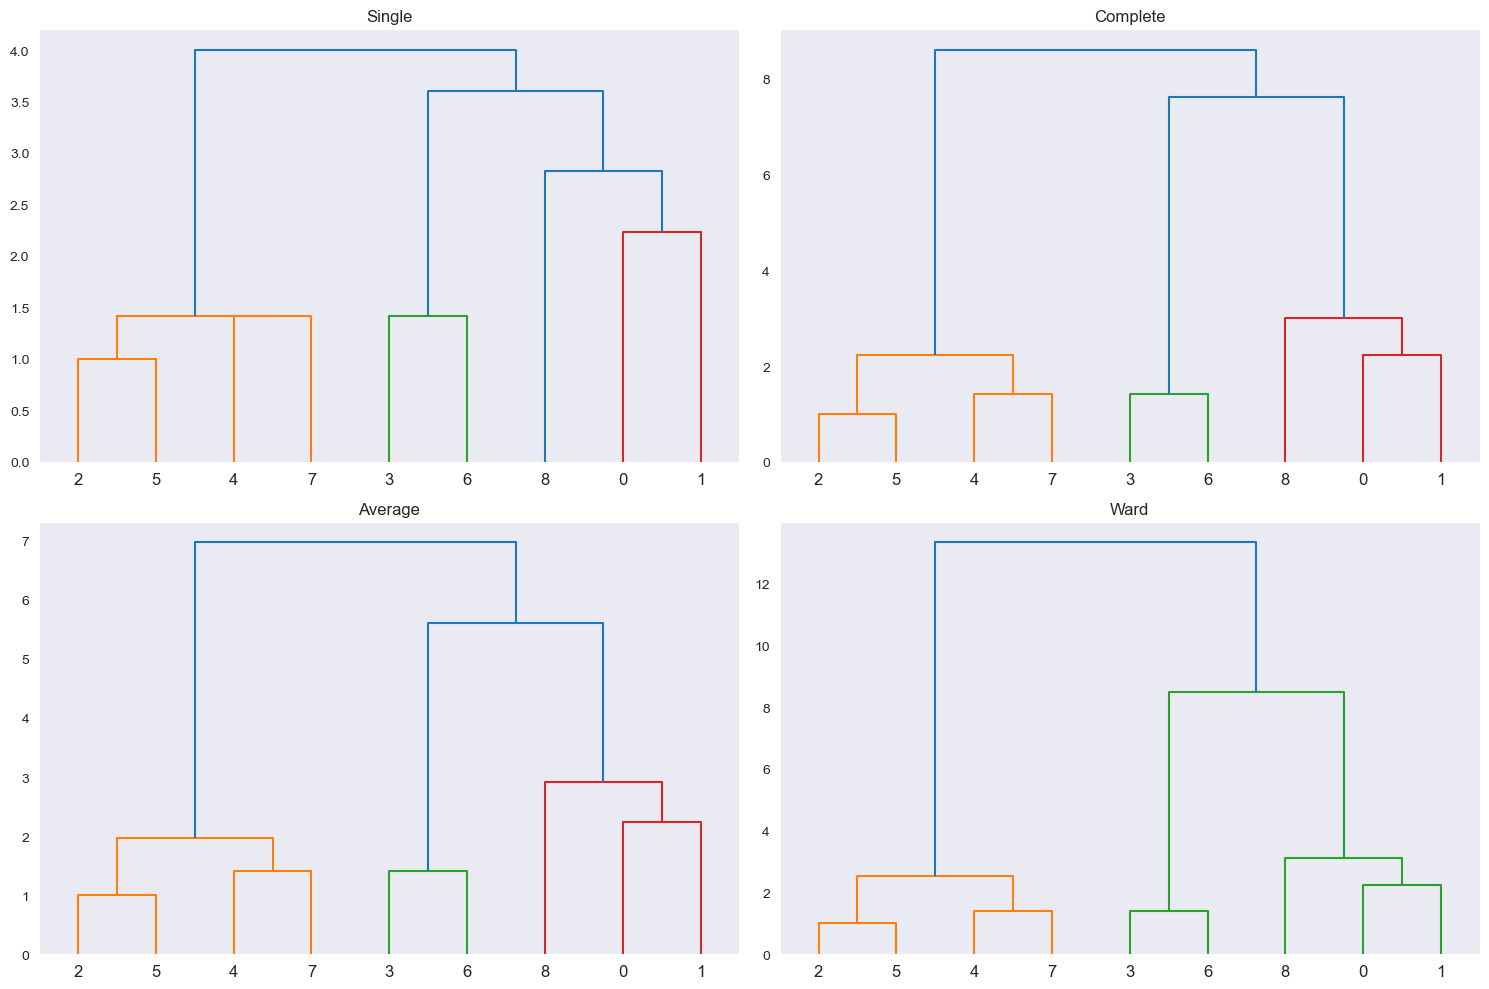

In [4]:
# Plot dendrograms for each linkage method
plt.figure(figsize=(15,10))

plt.subplot(2,2,1), dendrogram(Z_single), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z_complete), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z_average), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z_ward), plt.title('Ward')

plt.tight_layout()
plt.show()

## Step 4: Cluster Assignment Based on Dendrogram

Use the Ward linkage dendrogram to form two clusters.

In [5]:
# Assign clusters using Ward linkage
clusters = fcluster(Z_ward, 2, criterion='maxclust')
print(f'Clusters: {clusters}')

# Verify with Agglomerative Clustering from sklearn
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agglomerative.fit_predict(x1)
print(f'Agglomerative Clustering Labels: {labels}')

Clusters: [2 2 1 2 1 1 2 1 2]
Agglomerative Clustering Labels: [0 0 1 0 1 1 0 1 0]


## Step 5: Hierarchical Clustering on External Datasets

Let's perform clustering on different datasets, such as a Protein dataset and the Iris dataset.

In [6]:
# Load Protein dataset
df_protein = pd.read_csv('protein.csv')
df_protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


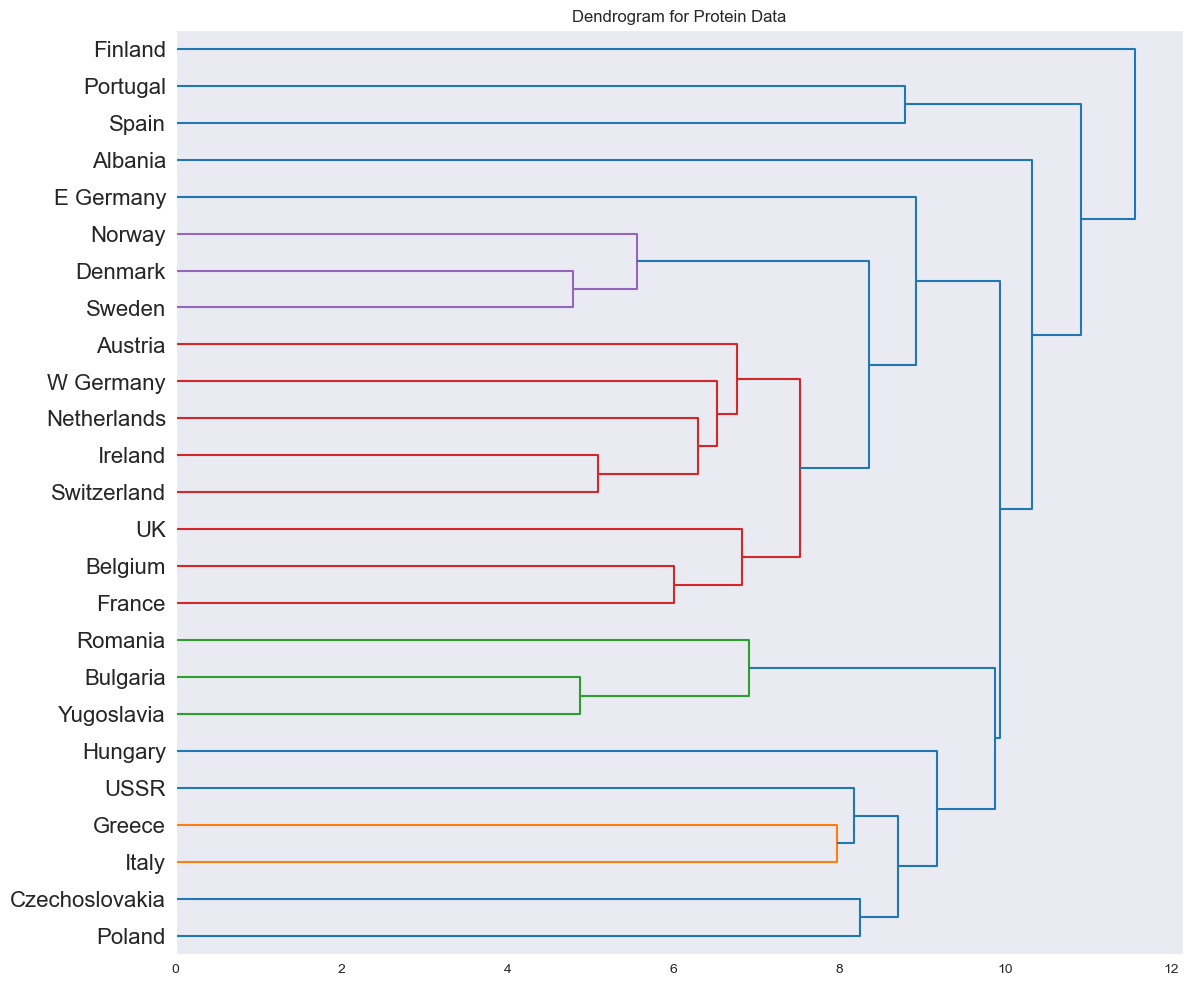

In [7]:
# Perform clustering
x_protein = df_protein.drop(columns=['Country'])
Z_protein = linkage(x_protein, method='single', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(13,12))
dendrogram(Z_protein, orientation='right', labels=list(df_protein['Country']), 
           distance_sort='descending', leaf_font_size=16)
plt.title('Dendrogram for Protein Data')
plt.show()

## Step 6: Clustering on the Iris Dataset

Encode species labels and visualize the dendrogram.

In [8]:
# Load Iris dataset
df_iris = pd.read_csv('iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


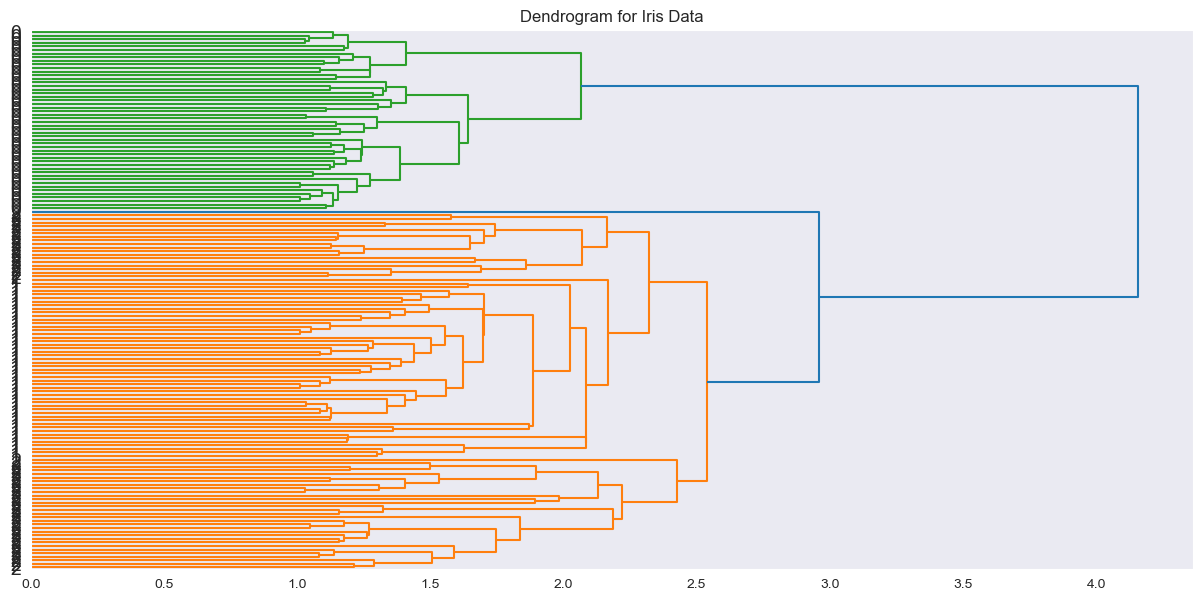

In [9]:
# Encode species labels
le = LabelEncoder()
df_iris['Species'] = le.fit_transform(df_iris['Species'])
x_iris = df_iris.drop(columns=['Species'])

# Perform clustering
Z_iris = linkage(x_iris, method='single', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15,7))
dendrogram(Z_iris, orientation='right', labels=list(df_iris['Species']), 
           distance_sort='descending', leaf_font_size=14)
plt.title('Dendrogram for Iris Data')
plt.show()

## Step 7: Clustering on Customer Churn Data

Encode categorical variables and visualize the dendrogram.

In [10]:
# Load Churn Modelling dataset
df_churn = pd.read_csv("Churn_Modelling.csv")
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


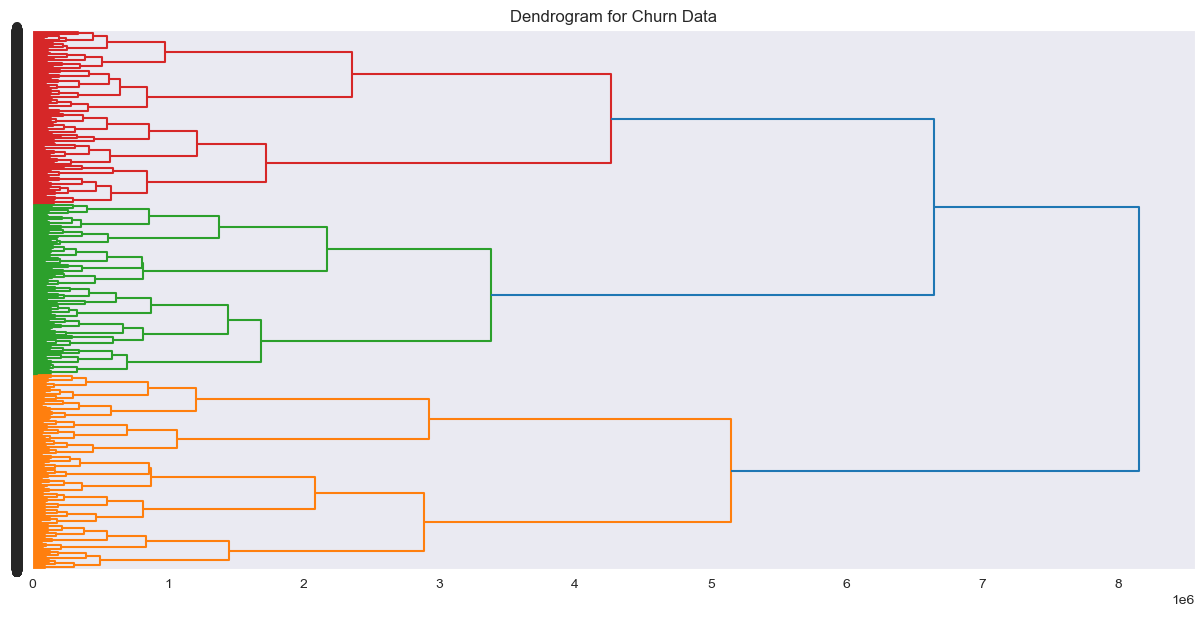

In [11]:
# Encode categorical variables
le = LabelEncoder()
df_churn['Surname'] = le.fit_transform(df_churn['Surname'])
df_churn['Geography'] = le.fit_transform(df_churn['Geography'])
df_churn['Gender'] = le.fit_transform(df_churn['Gender'])
x_churn = df_churn.drop(columns=['Exited'])

# Perform clustering
Z_churn = linkage(x_churn, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(Z_churn, orientation='right', labels=list(df_churn['Exited']), 
           distance_sort='ascending', leaf_font_size=16)
plt.title('Dendrogram for Churn Data')
plt.show()